[nltk_data] Downloading package punkt to /Users/msoknic/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/msoknic/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Processing file: trainingandtestdata/training_data.csv
   Sentiment          ID                          Date     Query  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

          Username                                               Text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 co

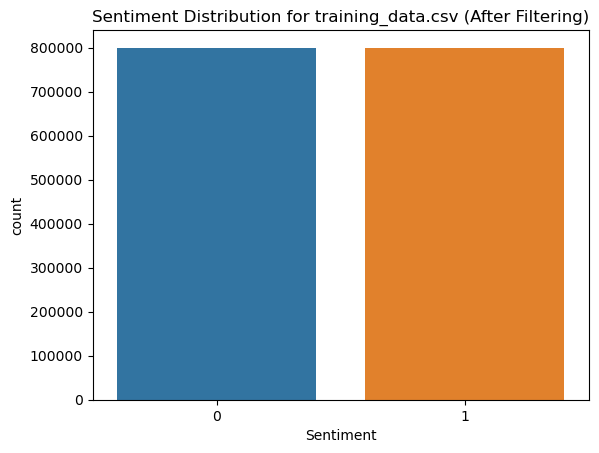

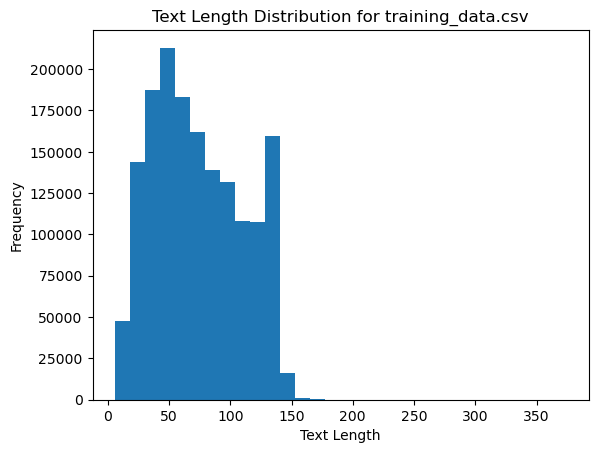

Processed data saved as 'trainingandtestdata/processed_training_data.csv'
Processing file: trainingandtestdata/test_data.csv
   Sentiment  ID                          Date    Query  Username  \
0          4   3  Mon May 11 03:17:40 UTC 2009  kindle2    tpryan   
1          4   4  Mon May 11 03:18:03 UTC 2009  kindle2    vcu451   
2          4   5  Mon May 11 03:18:54 UTC 2009  kindle2    chadfu   
3          4   6  Mon May 11 03:19:04 UTC 2009  kindle2     SIX15   
4          4   7  Mon May 11 03:21:41 UTC 2009  kindle2  yamarama   

                                                Text  
0  @stellargirl I loooooooovvvvvveee my Kindle2. ...  
1  Reading my kindle2...  Love it... Lee childs i...  
2  Ok, first assesment of the #kindle2 ...it fuck...  
3  @kenburbary You'll love your Kindle2. I've had...  
4  @mikefish  Fair enough. But i have the Kindle2...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column     Non-Null C

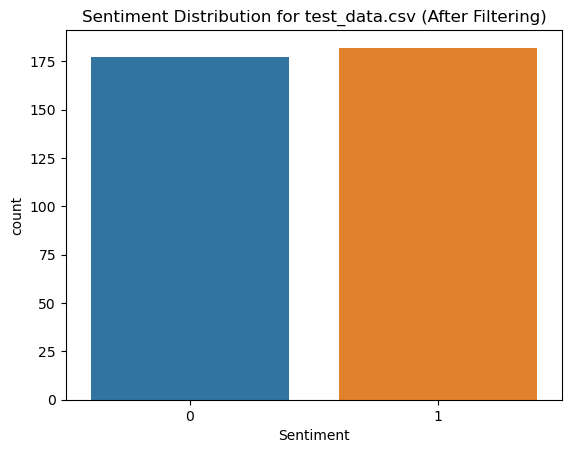

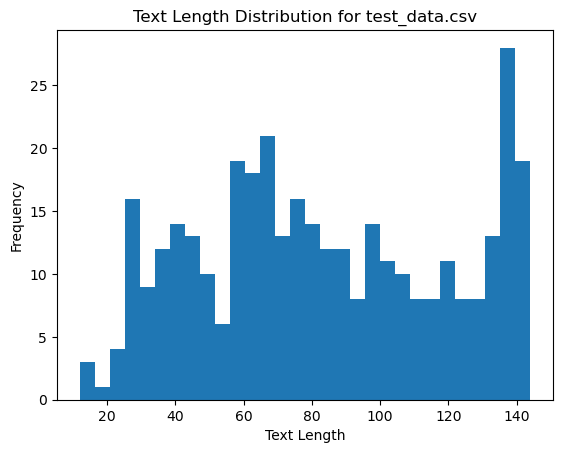

Processed data saved as 'trainingandtestdata/processed_test_data.csv'


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import os

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Folder containing the files
folder_path = 'trainingandtestdata'  # Update this if necessary

# File paths
training_file_path = os.path.join(folder_path, 'training_data.csv')
test_file_path = os.path.join(folder_path, 'test_data.csv')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess files
def preprocess_file(file_path, filter_neutral=False):
    # Load the dataset
    data = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)
    data.columns = ['Sentiment', 'ID', 'Date', 'Query', 'Username', 'Text']
    
    # Display initial info
    print(f"Processing file: {file_path}")
    print(data.head())
    print(data.info())
    
    if filter_neutral:
        # Filter out neutral sentiments if specified
        data = data[data['Sentiment'].isin([0, 4])]  # Keep only positive (4) and negative (0)
    
    # After filtering, display sentiment distribution
    sns.countplot(x='Sentiment', data=data.replace({4: 1}))
    plt.title(f"Sentiment Distribution for {os.path.basename(file_path)} (After Filtering)")
    plt.show()
    
    # Analyze text lengths
    data['text_length'] = data['Text'].apply(len)
    plt.hist(data['text_length'], bins=30)
    plt.title(f"Text Length Distribution for {os.path.basename(file_path)}")
    plt.xlabel("Text Length")
    plt.ylabel("Frequency")
    plt.show()
    
    # Function to clean tweet text
    def clean_text(text):
        text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove @mentions
        text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)  # Remove URLs
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
        text = text.lower()  # Lowercase
        return text

    # Apply cleaning
    data['clean_text'] = data['Text'].apply(clean_text)

    # Function to tokenize and lemmatize
    def preprocess_text(text):
        tokens = word_tokenize(text)  # Tokenize
        tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
        return ' '.join(tokens)

    # Apply preprocessing
    data['processed_text'] = data['clean_text'].apply(preprocess_text)

    # Save the processed data
    processed_data = data[['Sentiment', 'processed_text']].replace({4: 1})  # Convert 4 to 1 for binary classification
    output_file = os.path.join(folder_path, f'processed_{os.path.basename(file_path)}')
    processed_data.to_csv(output_file, index=False)
    print(f"Processed data saved as '{output_file}'")

# Preprocess the training file
preprocess_file(training_file_path)

# Preprocess the test file and filter out neutral sentiments
preprocess_file(test_file_path, filter_neutral=True)
